In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns
from scipy.stats import bernoulli

In [2]:
n_trials = 0.5
p_success = 1

In [3]:
training_data = pd.DataFrame(data={"x":np.random.binomial(n = n_trials,p = p_success,size=1000)})

In [4]:
training_data

,x
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

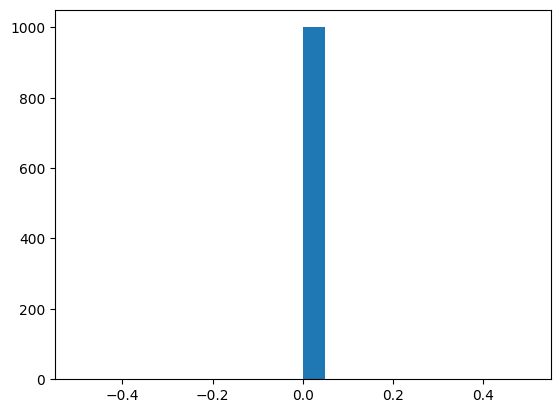

In [5]:
plt.hist(training_data, bins=20)

In [6]:
def del_by_del_bernaulli_nll(p_initial):
     p_initial = np.clip(p_initial, 1e-10, 1 - 1e-10)
     del_by_del_p = -np.mean(training_data)/p_initial - np.mean(1-training_data)/(1-p_initial)
     return del_by_del_p

In [7]:
def bernaulli_nll(p):
    # Ensure p is not too close to 0 or 1
    p = np.clip(p, 1e-10, 1 - 1e-10)
    log_pdf = -np.mean(s.bernoulli.logpmf(training_data, p))
    return log_pdf                    

In [8]:
epsilon = 10**(-2)
epoch_counter = 0
p_initial = 0.5  # Start with a value in (0, 1) to avoid division by zero
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_bernaulli_nll(p_initial)

    p_final = p_initial - (epsilon * initial_gradients)

    nll_initial_value = bernaulli_nll(p_initial)
    nll_final_value = bernaulli_nll(p_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    p_initial = p_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 0.6931471805599454
Epoch # 2, NLL Value = 0.7339691750802005
Epoch # 3, NLL Value = 0.7783420266231771
Epoch # 4, NLL Value = 0.8269344178535771
Epoch # 5, NLL Value = 0.8806217735700094
Epoch # 6, NLL Value = 0.9405806100808429
Epoch # 7, NLL Value = 1.0084432563454047
Epoch # 8, NLL Value = 1.0865657940638032
Epoch # 9, NLL Value = 1.1785248930809475
Epoch # 10, NLL Value = 1.2901242960320023
Epoch # 11, NLL Value = 1.4316926906797949
Epoch # 12, NLL Value = 1.6243160214683452
Epoch # 13, NLL Value = 1.9221169029509173
Epoch # 14, NLL Value = 2.5517799651419795


In [9]:
print(f"Converged after {epoch_counter} epochs. Final NLL Value = {nll_initial_value}")

Converged after 14 epochs. Final NLL Value = 23.025850847200097


In [10]:
sns.distplot(a=training_data["x"],bins=10,fit=s.bernaulli,kde=False)

AttributeError: module 'scipy.stats' has no attribute 'bernaulli'

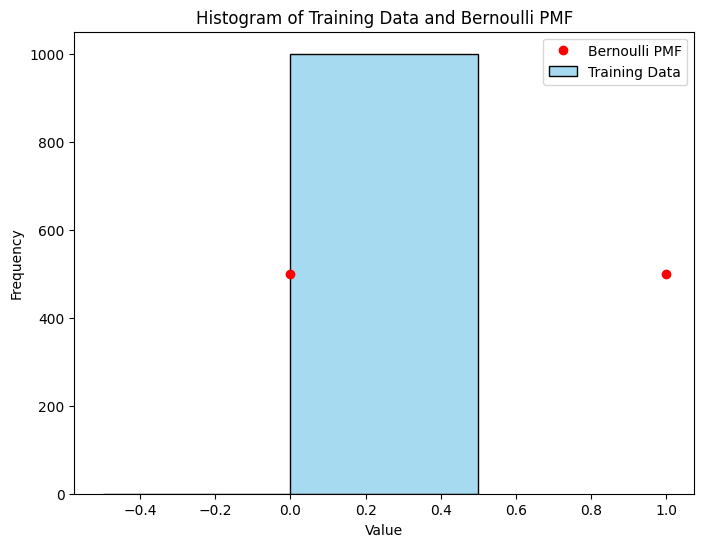

In [11]:
# Compute the PMF of Bernoulli distribution
p = 0.5  # Replace this with your estimated p value
x = np.arange(2)  # Bernoulli outcomes are 0 and 1
pmf = bernoulli.pmf(x, p)

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(training_data["x"], bins=2, kde=False, color='skyblue', label='Training Data')

# Overlay the Bernoulli PMF
plt.plot(x, pmf * len(training_data), 'o', color='red', label='Bernoulli PMF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Training Data and Bernoulli PMF')
plt.legend()
plt.show()